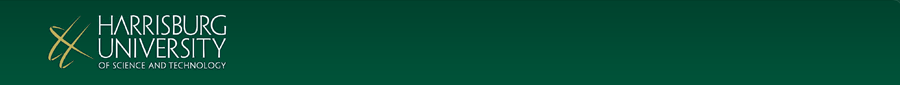
<br>
# CISC 340
# Introduction to Artificial Intelligence
## Lab Booklet #03
## Lab Title: Heurisitic Searching
***
### **Instructors**
### Brian Grey M.S.
### Chad Van Chu M.S.
***

# Objectives
#### Searching problems are central to gaining an understanding of Artificial Intelligence. We will be continuing our work from the last class by implementing two classic algorithms central to the concept of modern AI: Dijkstra’s algorithm and the heuristic-based extension, A*. We will construct an algorithm so that, if fed information in the proper format, our algorithm can find the shortest path between two specified points and, potentially, display the state of the search along the way.

#### After completing this lab, you will be able to:

- __Create and implement a novel design for representing a graph__
- __Understand the differences in theory and application between Dijksta’s search algorithm and A*__
- __Understand the principle of an admissible optimistic heuristic__
- __Design and parameterize robust and necessary output__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [https://en.wikipedia.org/wiki/A*_search_algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 340 Lab 03 FA19.ipynb

# Instructions & Questions
Dijkstra and A* both work on directed and undirected connected graphs where edge weights are non-negative. Given this we are going to need to construct a graph of this type and store it within our code. We can then pass this graph to the function which runs the search. The call to the function is to take the form:

`searchXxxxx(Graph g, Node start, Node end, bit robust_output)`

Where `Xxxxx` is the name of the algorithm, `Graph g` is the graph being searched, `Node start` is the starting point, `Node end` is the ending point, and `bit robust_output` represents whether the program will display more output while it is running.
When storing your graph, you will need to store each node within the graph and the connections between the nodes. For this lab, we are going to assume that edge weights are determined by Euclidean distance. Therefore, you will also need to store the coordinate of each node.

For your implementation, you will run a search using Dijkstra and A* on the graph given to determine the shortest path for `Node start` to `Node end`. The program will output the shortest path between the two nodes, the length of the path, and the number of nodes visited for each algorithm.

# <u>Part 1: Design</u>

First, you need to determine certain design aspects regarding your solution.

#### 1. Explain, in detail, how you will store your graph and nodes within your code. Be sure to explain how the data will be structured internally.

I'm going to store my nodes as a list of list in the format 
[[id,[children],length to node,parent,heuristic,position],[id,[children],length to node,parent,heuristic,position],...]
For dijsktras all that is neccessary are the first four memebers these allow for a unique node identifier, a list of the children and how far they are away,the length to get to this node, and the parent so we can trace our path back to the start. When establishing the graph the parent and length to the node both start as null values. A* requires a few more things to be tracked namebly the heuristic value and the position of the node. The position of the node is used to get its euclidan distance from the goal allowing for the estblisment of a heuristic value. The heuristic value also starts as a null value.


#### 2. Explain, in detail, what additional information you will display when the <i>robust_output</i> flag is set to true. Information may be displayed before the search algorithm starts, during each iteration of searching, or after the search algorithm completes. Be sure to include when your additional data will be displayed.

When robust output is set to true it will output upon each node being processed the number of nodes processed, the id of thenode processed and the length of the path to that node. This data is useful for observing how the algorithm traverses through the nodes and gives the user a throuhg picture of how the end path was discovered.

# <u>Part 2: Concept</u>


#### 3. Translate the following maze into your graph storage methodology. You may document this using conceptual representations or code-based representations. Be sure to include “dead end” nodes in your graph.

![Maze](maze.png)

The wall of text below works for both my Dijsktra and my A* implementation the last two values are ignored for Dijsktra and could be removed when running Dijsktra. They are however neccessary for my A* implementation. 

To develop this list of lists i began by drawing a grid over the maze to give me a way to measure distance and assign identifiers to identified nodes. Once this grid was established I labelled the start space A1 and the one below it A2 and so on until the entire grid had an identifier. I considered treating some nodes as edges if they branched were a straight stretch such as from the start down to the first turn but I decided to represent the mididle portion as node as well. This means more needs to be stored but iwas interested to see how the algorithm would work.


[['A1', [['B1', 1], ['A2', 1]], None, None, None, [0, 0]], ['A2', [['A1', 1], ['A3', 1]], None, None, None, [0, 1]], ['A3', [['A2', 1], ['B3', 1]], None, None, None, [0, 2]], ['A4', [['B4', 1], ['A5', 1]], None, None, None, [0, 3]], ['A5', [['A4', 1], ['B5', 1]], None, None, None, [0, 4]], ['B1', [['A1', 1], ['C1', 1]], None, None, None, [1, 0]], ['B2', [['C2', 1]], None, None, None, [1, 1]], ['B3', [['A3', 1], ['B4', 1]], None, None, None, [1, 2]], ['B4', [['A4', 1], ['C4', 1], ['B3', 1]], None, None, None, [1, 3]], ['B5', [['A5', 1], ['C5', 1]], None, None, None, [1, 4]], ['C1', [['B1', 1], ['C2', 1]], None, None, None, [2, 0]], ['C2', [['B2', 1], ['C1', 1]], None, None, None, [2, 1]], ['C3', [['D3', 1], ['C4', 1]], None, None, None, [2, 2]], ['C4', [['B4', 1], ['C3', 1]], None, None, None, [2, 3]], ['C5', [['B5', 1], ['D5', 1]], None, None, None, [2, 4]], ['D1', [['E1', 1], ['D2', 1]], None, None, None, [3, 0]], ['D2', [['D1', 1], ['E5', 1]], None, None, None, [3, 1]], ['D3', [['C3', 1]], None, None, None, [3, 2]], ['D4', [['E4', 1], ['D5', 1]], None, None, None, [3, 3]], ['D5', [['D4', 1], ['C5', 1]], None, None, None, [3, 4]], ['E1', [['D1', 1], ['F1', 1]], None, None, None, [4, 0]], ['E2', [['D2', 1], ['E3', 1]], None, None, None, [4, 1]], ['E3', [['E2', 1], ['E4', 1], ['F3', 1]], None, None, None, [4, 2]], ['E4', [['E3', 1], ['E5', 1], ['D4', 1]], None, None, None, [4, 3]], ['E5', [['E4', 1], ['F5', 1]], None, None, None, [4, 4]], ['F1', [['E1', 1], ['F2', 1]], None, None, None, [5, 0]], ['F2', [['F1', 1], ['G2', 1]], None, None, None, [5, 1]], ['F3', [['E3', 1], ['F4', 1]], None, None, None, [5, 2]], ['F4', [['F3', 1], ['G4', 1]], None, None, None, [5, 3]], ['F5', [['E5', 1]], None, None, None, [5, 4]], ['G1', [['G2', 1], ['H1', 1]], None, None, None, [6, 0]], ['G2', [['G1', 1], ['F2', 1], ['G3', 1]], None, None, None, [6, 1]], ['G3', [['G2', 1], ['H3', 1]], None, None, None, [6, 2]], ['G4', [['F4', 1]], None, None, None, [6, 3]], ['G5', [['H5', 1]], None, None, None, [6, 4]], ['H1', [['G1', 1], ['I1', 1]], None, None, None, [7, 0]], ['H2', [['H3', 1]], None, None, None, [7, 1]], ['H3', [['H2', 1], ['G3', 1]], None, None, None, [7, 2]], ['H4', [['I4', 1], ['H5', 1]], None, None, None, [7, 3]], ['H5', [['H4', 1], ['G5', 1], ['I5', 1]], None, None, None, [7, 4]],['I1', [['H1', 1], ['J1', 1]], None, None, None, [8, 0]], ['I2', [['J2', 1], ['I3', 1]], None, None, None, [8, 1]], ['I3', [['I2', 1], ['I4', 1]], None, None, None, [8, 2]], ['I4', [['I3', 1], ['H4', 1], ['J4', 1]], None, None, None, [8, 3]], ['I5', [['H5', 1], ['J5', 1]], None, None, None, [8, 4]], ['J1', [['I1', 1], ['J2', 1]], None, None, None, [9, 0]], ['J2', [['J1', 1], ['I2', 1]], None, None, None, [9, 1]], ['J3', [['J4', 1]], None, None, None, [9, 2]], ['J4', [['J3', 1], ['I4', 1]], None, None, None, [9, 3]], ['J5', [['I5', 1]], None, None, None, [9, 4]]]

# <u>Part 3: Implementation</u>


#### 4.	Implement your solution for the `searchDijsktra` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [26]:
def searchDijsktra(graph,start,end,robust):
    #unvisited is used to store potential next nodes 
    unvisited = []
    #current holds the current node to be observed
    current = None
    #count is used to track nodes proccesed
    count = 0
    #gets the starting position from the graph and adds its children to unvisited
    for x in graph:
        if x[0] == start:
            x[2] = 0
            current = x
            for child in x[1]:
                unvisited.append(child)
    #the main loop of the program will terminate when the goal is found
    while current[0] != end:

        count += 1
        #if statement is for handling of dead ends it checks to see if it has hit one if so it goes to the next
        # smallest node in unvisted and starts the loop over
        if len(current[1]) == 1:
            check = None
            for x in unvisited:
                for node in graph:
                    if x == node[0]:
                        if check == None:
                            check = node
                        else:
                            if check[2] >  node [2]:
                                check = node
            current = check
            unvisited.remove(check[0])
        else:
            #finds the nodes children in the graph and adds them to unvisited for future processing updates distance
            #to child if it is smaller than current distance to that node
            for child in current[1]:
                for node in graph:
                    if node[0] == child[0]:
                        if node[3] == None:
                            node[2] = child[1] + current[2]
                            node[3] = current[0]
                            unvisited.append(node[0])
                        elif node[2] > child[1] + current[2]:
                            node[2] = child[1] + current[2]
                            node[3] = current[0]
                            unvisited.append(node[0])
            #temporary storage of nodes for comparison 
            check = None
            #these nested for loops are for deciding which member of unvisited should be the next node to process
            for x in unvisited:
                for node in graph:
                    if x == node[0]:
                        if check == None:
                            check = node
                        else:
                            if check[2] >  node [2]:
                                check = node
            #after shortest path is found is found it is made the next current node and then is removed from unvisited
            current = check
            unvisited.remove(check[0])
            #if robust was set to true it outputs Nodes processed, node ID and length of path
            if robust:
                print("Nodes Processed: " + str(count) + " Node ID: " + str(current[0])+ " Path Length: " + str(current[2]))
    #this formats the output so that the path, length of path and processed nodes are outputed
    for x in graph:
        if x[0] == end:
            path = []
            state = True
            z = x
            while state:
                
                for y in graph:
                    if y[0] == z[3]:
                        path.insert(0, y[0])
                        z = y
                    if z[3] == start:
                        path.append(end)
                        path.insert(0, start)
                        return [path, x[2] , count]
                
graph1 =[['A1', [['B1', 1], ['A2', 1]], None, None, None, [0, 0]], ['A2', [['A1', 1], ['A3', 1]], None, None, None, [0, 1]], ['A3', [['A2', 1], ['B3', 1]], None, None, None, [0, 2]], ['A4', [['B4', 1], ['A5', 1]], None, None, None, [0, 3]], ['A5', [['A4', 1], ['B5', 1]], None, None, None, [0, 4]], ['B1', [['A1', 1], ['C1', 1]], None, None, None, [1, 0]], ['B2', [['C2', 1]], None, None, None, [1, 1]], ['B3', [['A3', 1], ['B4', 1]], None, None, None, [1, 2]], ['B4', [['A4', 1], ['C4', 1], ['B3', 1]], None, None, None, [1, 3]], ['B5', [['A5', 1], ['C5', 1]], None, None, None, [1, 4]], 
         ['C1', [['B1', 1], ['C2', 1]], None, None, None, [2, 0]], ['C2', [['B2', 1], ['C1', 1]], None, None, None, [2, 1]], ['C3', [['D3', 1], ['C4', 1]], None, None, None, [2, 2]], ['C4', [['B4', 1], ['C3', 1]], None, None, None, [2, 3]], ['C5', [['B5', 1], ['D5', 1]], None, None, None, [2, 4]], ['D1', [['E1', 1], ['D2', 1]], None, None, None, [3, 0]], ['D2', [['D1', 1], ['E5', 1]], None, None, None, [3, 1]], ['D3', [['C3', 1]], None, None, None, [3, 2]], ['D4', [['E4', 1], ['D5', 1]], None, None, None, [3, 3]], ['D5', [['D4', 1], ['C5', 1]], None, None, None, [3, 4]], 
         ['E1', [['D1', 1], ['F1', 1]], None, None, None, [4, 0]], ['E2', [['D2', 1], ['E3', 1]], None, None, None, [4, 1]], ['E3', [['E2', 1], ['E4', 1], ['F3', 1]], None, None, None, [4, 2]], ['E4', [['E3', 1], ['E5', 1], ['D4', 1]], None, None, None, [4, 3]], ['E5', [['E4', 1], ['F5', 1]], None, None, None, [4, 4]], ['F1', [['E1', 1], ['F2', 1]], None, None, None, [5, 0]], ['F2', [['F1', 1], ['G2', 1]], None, None, None, [5, 1]], ['F3', [['E3', 1], ['F4', 1]], None, None, None, [5, 2]], ['F4', [['F3', 1], ['G4', 1]], None, None, None, [5, 3]], ['F5', [['E5', 1]], None, None, None, [5, 4]], 
         ['G1', [['G2', 1], ['H1', 1]], None, None, None, [6, 0]], ['G2', [['G1', 1], ['F2', 1], ['G3', 1]], None, None, None, [6, 1]], ['G3', [['G2', 1], ['H3', 1]], None, None, None, [6, 2]], ['G4', [['F4', 1]], None, None, None, [6, 3]], ['G5', [['H5', 1]], None, None, None, [6, 4]], ['H1', [['G1', 1], ['I1', 1]], None, None, None, [7, 0]], ['H2', [['H3', 1]], None, None, None, [7, 1]], ['H3', [['H2', 1], ['G3', 1]], None, None, None, [7, 2]], ['H4', [['I4', 1], ['H5', 1]], None, None, None, [7, 3]], ['H5', [['H4', 1], ['G5', 1], ['I5', 1]], None, None, None, [7, 4]],
         ['I1', [['H1', 1], ['J1', 1]], None, None, None, [8, 0]], ['I2', [['J2', 1], ['I3', 1]], None, None, None, [8, 1]], ['I3', [['I2', 1], ['I4', 1]], None, None, None, [8, 2]], ['I4', [['I3', 1], ['H4', 1], ['J4', 1]], None, None, None, [8, 3]], ['I5', [['H5', 1], ['J5', 1]], None, None, None, [8, 4]], ['J1', [['I1', 1], ['J2', 1]], None, None, None, [9, 0]], ['J2', [['J1', 1], ['I2', 1]], None, None, None, [9, 1]], ['J3', [['J4', 1]], None, None, None, [9, 2]], ['J4', [['J3', 1], ['I4', 1]], None, None, None, [9, 3]], ['J5', [['I5', 1]], None, None, None, [9, 4]]]

print(searchDijsktra(graph1,'A1','J5',True))


Nodes Processed: 1 Node ID: B1 Path Length: 1
Nodes Processed: 2 Node ID: A2 Path Length: 1
Nodes Processed: 3 Node ID: A1 Path Length: 2
Nodes Processed: 4 Node ID: C1 Path Length: 2
Nodes Processed: 5 Node ID: A3 Path Length: 2
Nodes Processed: 6 Node ID: C2 Path Length: 3
Nodes Processed: 7 Node ID: B3 Path Length: 3
Nodes Processed: 8 Node ID: B2 Path Length: 4
Nodes Processed: 10 Node ID: A4 Path Length: 5
Nodes Processed: 11 Node ID: C4 Path Length: 5
Nodes Processed: 12 Node ID: A5 Path Length: 6
Nodes Processed: 13 Node ID: C3 Path Length: 6
Nodes Processed: 14 Node ID: B5 Path Length: 7
Nodes Processed: 15 Node ID: D3 Path Length: 7
Nodes Processed: 17 Node ID: D5 Path Length: 9
Nodes Processed: 18 Node ID: D4 Path Length: 10
Nodes Processed: 19 Node ID: E4 Path Length: 11
Nodes Processed: 20 Node ID: E3 Path Length: 12
Nodes Processed: 21 Node ID: E5 Path Length: 12
Nodes Processed: 22 Node ID: E2 Path Length: 13
Nodes Processed: 23 Node ID: F3 Path Length: 13
Nodes Processed


#### 5. Implement your solution for the `searchAStar` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [27]:
# due to the similarity to Dijsktra I'm only going to comment on differences
def searchAStar(graph,start,end,robust):
    unvisited = []
    current = None
    #for storing the position of the goal
    endpos = None
    count = 0
    #gets the position of the goal
    for x in graph:
        if x[0] == end:
            endpos = x[5]
    #calculates the euclidean distance from the goal of each node and assigns it as its heuristic value
    for x in graph:
        x[4] = ((((x[5][0] - endpos[0]) ** 2) + ((x[5][1] - endpos[1]) ** 2) ** 2) ** .5)
    for x in graph:
        if x[0] == start:
            x[2] = 0
            current = x
            for child in x[1]:
                unvisited.append(child)
    while current[0] != end:
        count += 1
        if len(current[1]) == 1:
            check = None
            for x in unvisited:
                for node in graph:
                    if x == node[0]:
                        if check == None:
                            check = node
                        else:
                            if check[2] >  node [2]:
                                check = node
            current = check
            unvisited.remove(check[0])
        else:
            for child in current[1]:
                for node in graph:
                    if node[0] == child[0]:
                        if node[3] == None:
                            node[2] = child[1] + current[2]
                            node[3] = current[0]
                            unvisited.append(node[0])
                        elif node[2] > child[1] + current[2]:
                            node[2] = child[1] + current[2]
                            node[3] = current[0]
                            unvisited.append(node[0])
            check = None
            # utilizes the heuristic value to weight which nodes it is going to vist by adding it to the distance between nodes
            for x in unvisited:
                for node in graph:
                    if x == node[0]:
                        if check == None:
                            check = node
                        else:
                            if (check[2] + check[4])  >  (node[2] + node[4]):
                                check = node
            current = check
            unvisited.remove(check[0])
            if robust:
                print("Nodes Processed: " + str(count) + " Node ID: " + str(current[0])+ " Path Length: " + str(current[2]))
                
    for x in graph:
        if x[0] == end:
            path = []
            state = True
            z = x
            while state:
                
                for y in graph:
                    if y[0] == z[3]:
                        path.insert(0, y[0])
                        z = y
                    if z[3] == start:
                        path.append(end)
                        path.insert(0, start)
                        return [path, x[2] , count]
                
graph1 =[['A1', [['B1', 1], ['A2', 1]], None, None, None, [0, 0]], ['A2', [['A1', 1], ['A3', 1]], None, None, None, [0, 1]], ['A3', [['A2', 1], ['B3', 1]], None, None, None, [0, 2]], ['A4', [['B4', 1], ['A5', 1]], None, None, None, [0, 3]], ['A5', [['A4', 1], ['B5', 1]], None, None, None, [0, 4]], ['B1', [['A1', 1], ['C1', 1]], None, None, None, [1, 0]], ['B2', [['C2', 1]], None, None, None, [1, 1]], ['B3', [['A3', 1], ['B4', 1]], None, None, None, [1, 2]], ['B4', [['A4', 1], ['C4', 1], ['B3', 1]], None, None, None, [1, 3]], ['B5', [['A5', 1], ['C5', 1]], None, None, None, [1, 4]], 
         ['C1', [['B1', 1], ['C2', 1]], None, None, None, [2, 0]], ['C2', [['B2', 1], ['C1', 1]], None, None, None, [2, 1]], ['C3', [['D3', 1], ['C4', 1]], None, None, None, [2, 2]], ['C4', [['B4', 1], ['C3', 1]], None, None, None, [2, 3]], ['C5', [['B5', 1], ['D5', 1]], None, None, None, [2, 4]], ['D1', [['E1', 1], ['D2', 1]], None, None, None, [3, 0]], ['D2', [['D1', 1], ['E5', 1]], None, None, None, [3, 1]], ['D3', [['C3', 1]], None, None, None, [3, 2]], ['D4', [['E4', 1], ['D5', 1]], None, None, None, [3, 3]], ['D5', [['D4', 1], ['C5', 1]], None, None, None, [3, 4]], 
         ['E1', [['D1', 1], ['F1', 1]], None, None, None, [4, 0]], ['E2', [['D2', 1], ['E3', 1]], None, None, None, [4, 1]], ['E3', [['E2', 1], ['E4', 1], ['F3', 1]], None, None, None, [4, 2]], ['E4', [['E3', 1], ['E5', 1], ['D4', 1]], None, None, None, [4, 3]], ['E5', [['E4', 1], ['F5', 1]], None, None, None, [4, 4]], ['F1', [['E1', 1], ['F2', 1]], None, None, None, [5, 0]], ['F2', [['F1', 1], ['G2', 1]], None, None, None, [5, 1]], ['F3', [['E3', 1], ['F4', 1]], None, None, None, [5, 2]], ['F4', [['F3', 1], ['G4', 1]], None, None, None, [5, 3]], ['F5', [['E5', 1]], None, None, None, [5, 4]], 
         ['G1', [['G2', 1], ['H1', 1]], None, None, None, [6, 0]], ['G2', [['G1', 1], ['F2', 1], ['G3', 1]], None, None, None, [6, 1]], ['G3', [['G2', 1], ['H3', 1]], None, None, None, [6, 2]], ['G4', [['F4', 1]], None, None, None, [6, 3]], ['G5', [['H5', 1]], None, None, None, [6, 4]], ['H1', [['G1', 1], ['I1', 1]], None, None, None, [7, 0]], ['H2', [['H3', 1]], None, None, None, [7, 1]], ['H3', [['H2', 1], ['G3', 1]], None, None, None, [7, 2]], ['H4', [['I4', 1], ['H5', 1]], None, None, None, [7, 3]], ['H5', [['H4', 1], ['G5', 1], ['I5', 1]], None, None, None, [7, 4]],
         ['I1', [['H1', 1], ['J1', 1]], None, None, None, [8, 0]], ['I2', [['J2', 1], ['I3', 1]], None, None, None, [8, 1]], ['I3', [['I2', 1], ['I4', 1]], None, None, None, [8, 2]], ['I4', [['I3', 1], ['H4', 1], ['J4', 1]], None, None, None, [8, 3]], ['I5', [['H5', 1], ['J5', 1]], None, None, None, [8, 4]], ['J1', [['I1', 1], ['J2', 1]], None, None, None, [9, 0]], ['J2', [['J1', 1], ['I2', 1]], None, None, None, [9, 1]], ['J3', [['J4', 1]], None, None, None, [9, 2]], ['J4', [['J3', 1], ['I4', 1]], None, None, None, [9, 3]], ['J5', [['I5', 1]], None, None, None, [9, 4]]]
print(searchAStar(graph1,'A1','J5',True))                

Nodes Processed: 1 Node ID: A2 Path Length: 1
Nodes Processed: 2 Node ID: A3 Path Length: 2
Nodes Processed: 3 Node ID: B3 Path Length: 3
Nodes Processed: 4 Node ID: B4 Path Length: 4
Nodes Processed: 5 Node ID: C4 Path Length: 5
Nodes Processed: 6 Node ID: A4 Path Length: 5
Nodes Processed: 7 Node ID: C3 Path Length: 6
Nodes Processed: 8 Node ID: D3 Path Length: 7
Nodes Processed: 10 Node ID: A5 Path Length: 6
Nodes Processed: 11 Node ID: B5 Path Length: 7
Nodes Processed: 12 Node ID: C5 Path Length: 8
Nodes Processed: 13 Node ID: D5 Path Length: 9
Nodes Processed: 14 Node ID: D4 Path Length: 10
Nodes Processed: 15 Node ID: E4 Path Length: 11
Nodes Processed: 16 Node ID: E5 Path Length: 12
Nodes Processed: 17 Node ID: F5 Path Length: 13
Nodes Processed: 19 Node ID: E3 Path Length: 12
Nodes Processed: 20 Node ID: F3 Path Length: 13
Nodes Processed: 21 Node ID: F4 Path Length: 14
Nodes Processed: 22 Node ID: G4 Path Length: 15
Nodes Processed: 24 Node ID: C2 Path Length: 3
Nodes Process


#### 6.	How does the performance of your `searchDijsktra` function compare with the performance of the `searchAStar` function? Explain, in detail, with whatever relevant data you have from your code.

A* and Dijsktra are identiacal in all but a few lines meaning there are very similar however the heuristic value those few extra lines assign allow for a slightly faster implementation. Everytime main while loop runs one node is expanded upon and we get 'closer' to our goal by exploring more nodes. Dijsktra while loop runs 50 times while A* runs 48 times. This may not seem like alot but the A* algorithm I designed heuristic is good with straight lines so if the goal had been straight down it would have not maid any mistakes in trying to reach the goal or straight to the right. If this maze where much larger say a thousand nodes I think the difference between the twos run times would be much more in contrat as it is A* Star is definitly more efficant but there are potential cases in which the heuristic value could be 'tricked' reulting in the same runtime.